___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:
import datetime

### 2.Read dataset

In [3]:
df = pd.read_csv("store_sharing.csv")
df.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [4]:
df.count()

timestamp       17414
cnt             17414
t1              17414
t2              17414
hum             17414
wind_speed      17414
weather_code    17414
is_holiday      17414
is_weekend      17414
season          17414
dtype: int64

In [5]:
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [6]:
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [7]:
df.columns

Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

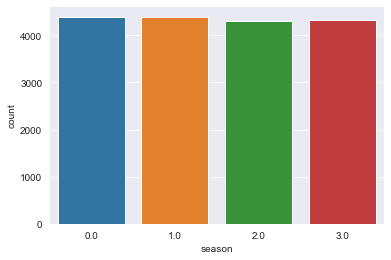

In [8]:
sns.countplot(x="season", data=df) ;

In [9]:
# season



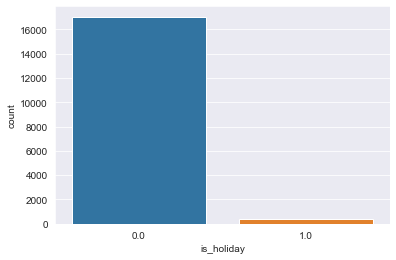

In [10]:
sns.countplot(x="is_holiday", data=df) ;

In [11]:
# is_holiday


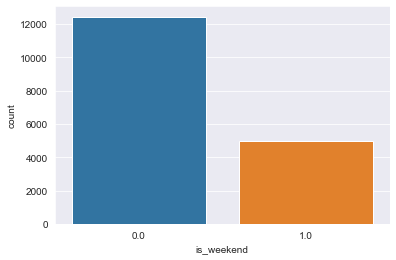

In [12]:
sns.countplot(x="is_weekend", data=df) ;

In [13]:
# is_weekend


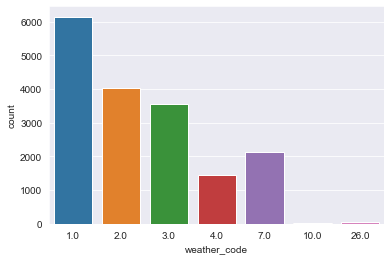

In [14]:
sns.countplot(x="weather_code", data=df) ;

In [15]:
# weather_code


### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [16]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [17]:
df.pivot_table(df,index="timestamp")

,cnt,hum,is_holiday,is_weekend,season,t1,t2,weather_code,wind_speed
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,93.0,0.0,1.0,3.0,3.0,2.0,3.0,6.0
2015-01-04 01:00:00,138,93.0,0.0,1.0,3.0,3.0,2.5,1.0,5.0
2015-01-04 02:00:00,134,96.5,0.0,1.0,3.0,2.5,2.5,1.0,0.0
2015-01-04 03:00:00,72,100.0,0.0,1.0,3.0,2.0,2.0,1.0,0.0
2015-01-04 04:00:00,47,93.0,0.0,1.0,3.0,2.0,0.0,1.0,6.5
...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,81.0,0.0,0.0,3.0,5.0,1.0,3.0,19.0
2017-01-03 20:00:00,541,81.0,0.0,0.0,3.0,5.0,1.0,4.0,21.0
2017-01-03 21:00:00,337,78.5,0.0,0.0,3.0,5.5,1.5,4.0,24.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

In [18]:
time = df[["timestamp"]].copy()
time.head(5)


,timestamp
0,2015-01-04 00:00:00
1,2015-01-04 01:00:00
2,2015-01-04 02:00:00
3,2015-01-04 03:00:00
4,2015-01-04 04:00:00


In [19]:
time["timestamp"] = pd.to_datetime(time["timestamp"])
time.head()

,timestamp
0,2015-01-04 00:00:00
1,2015-01-04 01:00:00
2,2015-01-04 02:00:00
3,2015-01-04 03:00:00
4,2015-01-04 04:00:00


In [20]:

time['year'] =time.timestamp.dt.year
time.head()

,timestamp,year
0,2015-01-04 00:00:00,2015
1,2015-01-04 01:00:00,2015
2,2015-01-04 02:00:00,2015
3,2015-01-04 03:00:00,2015
4,2015-01-04 04:00:00,2015


In [21]:

time['month'] =time.timestamp.dt.month
time.head()

,timestamp,year,month
0,2015-01-04 00:00:00,2015,1
1,2015-01-04 01:00:00,2015,1
2,2015-01-04 02:00:00,2015,1
3,2015-01-04 03:00:00,2015,1
4,2015-01-04 04:00:00,2015,1


In [22]:
time['day_of_year'] = time.timestamp.dt.dayofyear
time.head()

,timestamp,year,month,day_of_year
0,2015-01-04 00:00:00,2015,1,4
1,2015-01-04 01:00:00,2015,1,4
2,2015-01-04 02:00:00,2015,1,4
3,2015-01-04 03:00:00,2015,1,4
4,2015-01-04 04:00:00,2015,1,4


In [23]:
time['day_of_week'] = time.timestamp.dt.dayofweek
time.head()

,timestamp,year,month,day_of_year,day_of_week
0,2015-01-04 00:00:00,2015,1,4,6
1,2015-01-04 01:00:00,2015,1,4,6
2,2015-01-04 02:00:00,2015,1,4,6
3,2015-01-04 03:00:00,2015,1,4,6
4,2015-01-04 04:00:00,2015,1,4,6


In [24]:
time['hour'] = time.timestamp.dt.hour
time.head()

,timestamp,year,month,day_of_year,day_of_week,hour
0,2015-01-04 00:00:00,2015,1,4,6,0
1,2015-01-04 01:00:00,2015,1,4,6,1
2,2015-01-04 02:00:00,2015,1,4,6,2
3,2015-01-04 03:00:00,2015,1,4,6,3
4,2015-01-04 04:00:00,2015,1,4,6,4


### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [25]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [83]:
df["day_of_the_month"] = df.timestamp.dt.strftime("%d")
df.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_the_month,year,month,hour,day_of_week
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,04,2015,01,00,04
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,04,2015,01,01,04
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,04,2015,01,02,04
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,04,2015,01,03,04
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,04,2015,01,04,04


In [27]:
df["year"] = df.timestamp.dt.strftime("%Y")
df.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_the_month,year
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015


In [28]:
df["month"] = df.timestamp.dt.strftime("%m")
df.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_the_month,year,month
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,01
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,01
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,01
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,01
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,01


In [55]:
df["hour"] = df.timestamp.dt.strftime("%H")
df.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_the_month,year,month,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,01,00
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,01,01
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,01,02
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,01,03
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,01,04


In [84]:
df["day_of_week"] = df.timestamp.dt.strftime("%A")
df.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_the_month,year,month,hour,day_of_week
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,04,2015,01,00,Sunday
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,04,2015,01,01,Sunday
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,04,2015,01,02,Sunday
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,04,2015,01,03,Sunday
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,04,2015,01,04,Sunday


In [100]:
df["weekend"] = df.timestamp.dt.strftime("%w")
df.head(5)

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_the_month,year,month,hour,day_of_week,weekend
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,04,2015,01,00,Sunday,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,04,2015,01,01,Sunday,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,04,2015,01,02,Sunday,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,04,2015,01,03,Sunday,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,04,2015,01,04,Sunday,0


### 7.Visualize the correlation with a heatmap

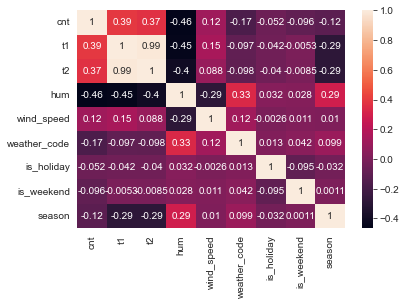

In [29]:
sns.heatmap(df.corr(), annot=True);

In [30]:
# for all variables 


In [31]:
# for the target variable


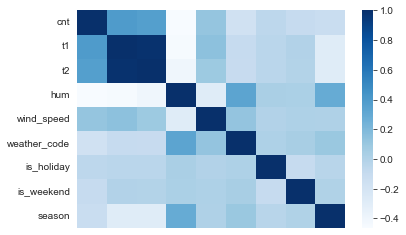

In [32]:
sns.heatmap(df.corr(), cmap="Blues",
            xticklabels=False
            );

### 8. Visualize the correlation of the target variable and the other features with barplot

In [ ]:
#with pandas


### 9.Plot bike shares over time use lineplot

In [ ]:
df.line

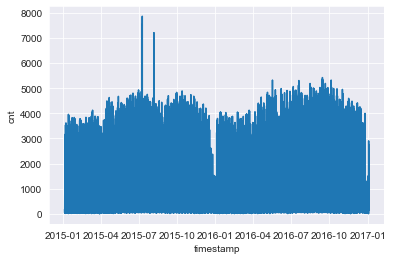

In [41]:
sns.lineplot(x = "timestamp", y = "cnt", data = df)
plt.show()

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

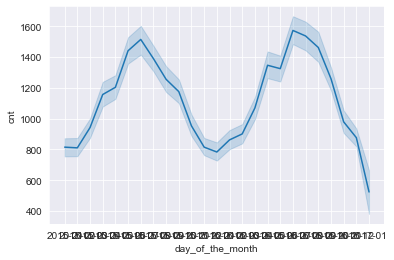

In [48]:
sns.lineplot(x = "day_of_the_month", y = "cnt", data = df)
plt.show();

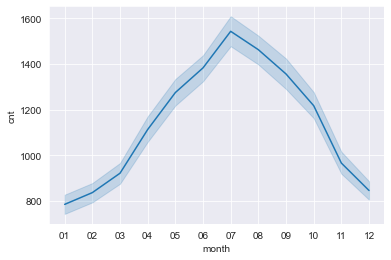

In [49]:
sns.lineplot(x = "month", y = "cnt", data = df)
plt.show();

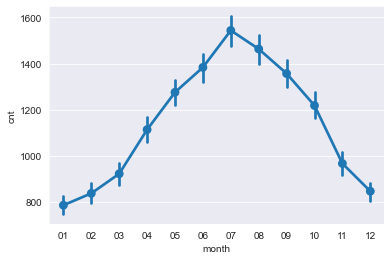

In [50]:
sns.pointplot(x = "month", y = "cnt", data = df)
plt.show();

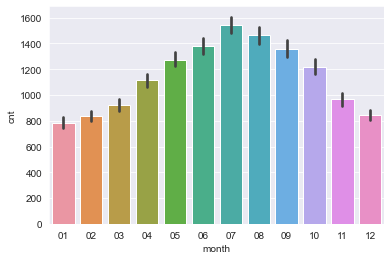

In [51]:
sns.barplot(x = "month", y = "cnt", data = df)
plt.show();

In [ ]:
# with lineplot


In [ ]:
# with lineplot


In [ ]:
# with pointplot


In [ ]:
# with barplot


### 11.Plot bike shares by hours on (holidays, weekend, season)

In [ ]:
# with lineplot (*whether it is a holiday or not*)


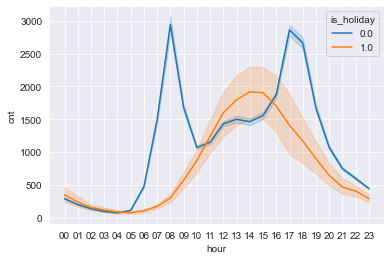

In [58]:
sns.lineplot(x = "hour", y = "cnt",hue="is_holiday", data = df)
plt.show();

In [ ]:
# with lineplot (*You may want to see seasonal breakdowns*)


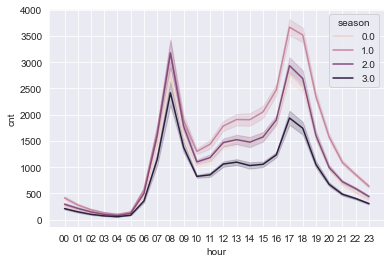

In [59]:
sns.lineplot(x = "hour", y = "cnt",hue="season", data = df)
plt.show();

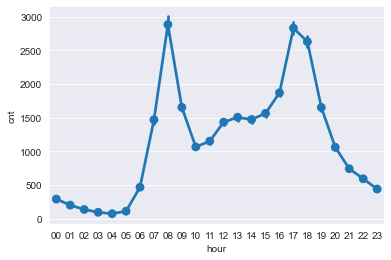

In [60]:
sns.pointplot(x = "hour", y = "cnt", data = df)
plt.show();

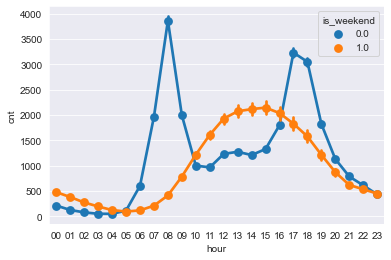

In [62]:
sns.pointplot(x = "hour", y = "cnt",hue="is_weekend", data = df)
plt.show();

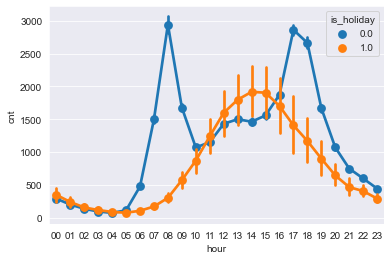

In [63]:
sns.pointplot(x = "hour", y = "cnt",hue="is_holiday", data = df)
plt.show();

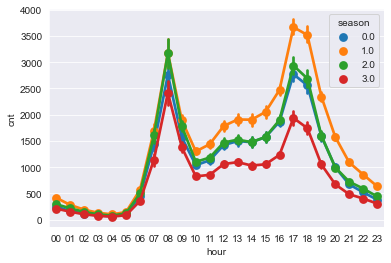

In [61]:
sns.pointplot(x = "hour", y = "cnt",hue="season", data = df)
plt.show();

In [ ]:
# with pointplot


### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

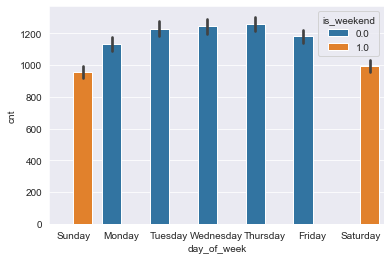

In [87]:
sns.barplot(x = "day_of_week", y = "cnt",hue="is_weekend", data = df)
plt.show();

In [ ]:
# with barplot


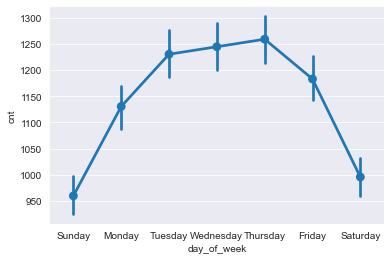

In [93]:
sns.pointplot(x = "day_of_week", y = "cnt", data = df)
plt.show();

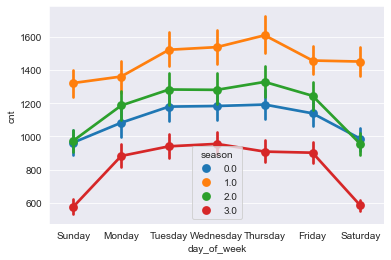

In [92]:
sns.pointplot(x = "day_of_week", y = "cnt",hue="season", data = df)
plt.show();

In [ ]:
# with pointplot


### 13.Plot bike shares by day of month

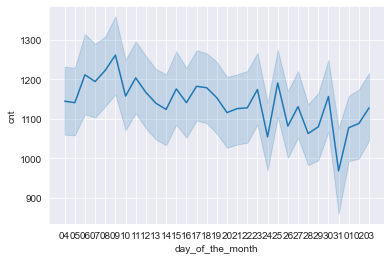

In [94]:
sns.lineplot(x = "day_of_the_month", y = "cnt", data = df)
plt.show();

In [ ]:
#with lineplot



### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

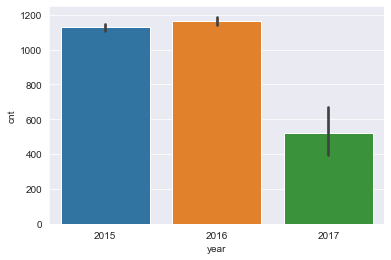

In [95]:
sns.barplot(x = "year", y = "cnt", data = df)
plt.show();

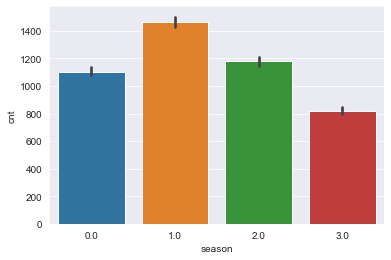

In [96]:
sns.barplot(x = "season", y = "cnt", data = df)
plt.show();

In [ ]:
# with barplot


In [ ]:
# with barplot

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

In [98]:
df.is_weekend.value_counts()

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

In [101]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,day_of_the_month,year,month,hour,day_of_week,weekend
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,04,2015,01,00,Sunday,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,04,2015,01,01,Sunday,0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,04,2015,01,02,Sunday,0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,04,2015,01,03,Sunday,0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,04,2015,01,04,Sunday,0


In [ ]:
# pie chart

In [122]:
b= df.is_weekend.count()

17414

In [ ]:
# with countplot



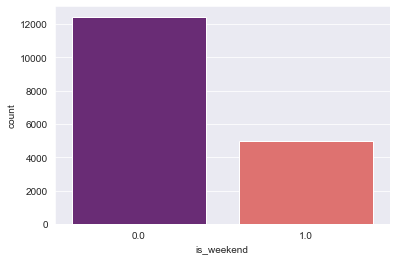

In [125]:
sns.countplot(x = "is_weekend", data = df, palette = 'magma')
plt.show()

### 16.Plot the distribution of weather code by seasons

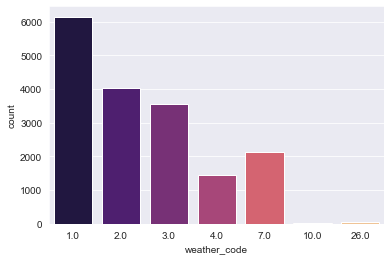

In [126]:
sns.countplot(x = "weather_code", data = df, palette = 'magma')
plt.show()

In [ ]:
# with countplot


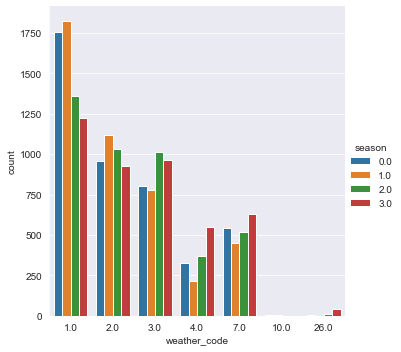

In [130]:
sns.catplot(x="weather_code",
                kind="count",hue="season",
                data=df);

In [ ]:
# with catplot


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___